# Chapter 3 - Linear Regression

This notebook presents the Python implementation of exercises from the book *"Introduction to Statistical Learning"* (a.k.a. ISLR) by Gareth James et al.

---

In [56]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# setup seaborn
sns.set_style('whitegrid')
sns.set_palette('RdBu')

# setup notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Lab Exercises

## Simple Regression

**Dataset**: Boston.csv; Housing Values in Suburbs of Boston, 506 rows
    
**Variables**:

* crim: per capita crime rate by town.
* n: proportion of residential land zoned for lots over 25,000 sq.ft.
* indus: proportion of non-retail business acres per town.
* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* nox: nitrogen oxides concentration (parts per 10 million).
* rm: average number of rooms per dwelling.
* age: proportion of owner-occupied units built prior to 1940.
* dis: weighted mean of distances to five Boston employment centres.
* rad: index of accessibility to radial highways.
* tax: full-value property-tax rate per \$10,000.
* ptratio: pupil-teacher ratio by town.
* black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* lstat: lower status of the population (percent).
* medv: median value of owner-occupied homes in \$1000s.

In [4]:
# Import data
boston_data = pd.read_csv('data/MASS/Boston.csv', index_col=0)

# Briefly explore the data
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


### Create and fit a simple linear regression model: mdev ~ lstat

In [59]:
est = smf.ols('medv ~ lstat', boston_data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           5.08e-88
Time:                        15:42:18   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualizing the model

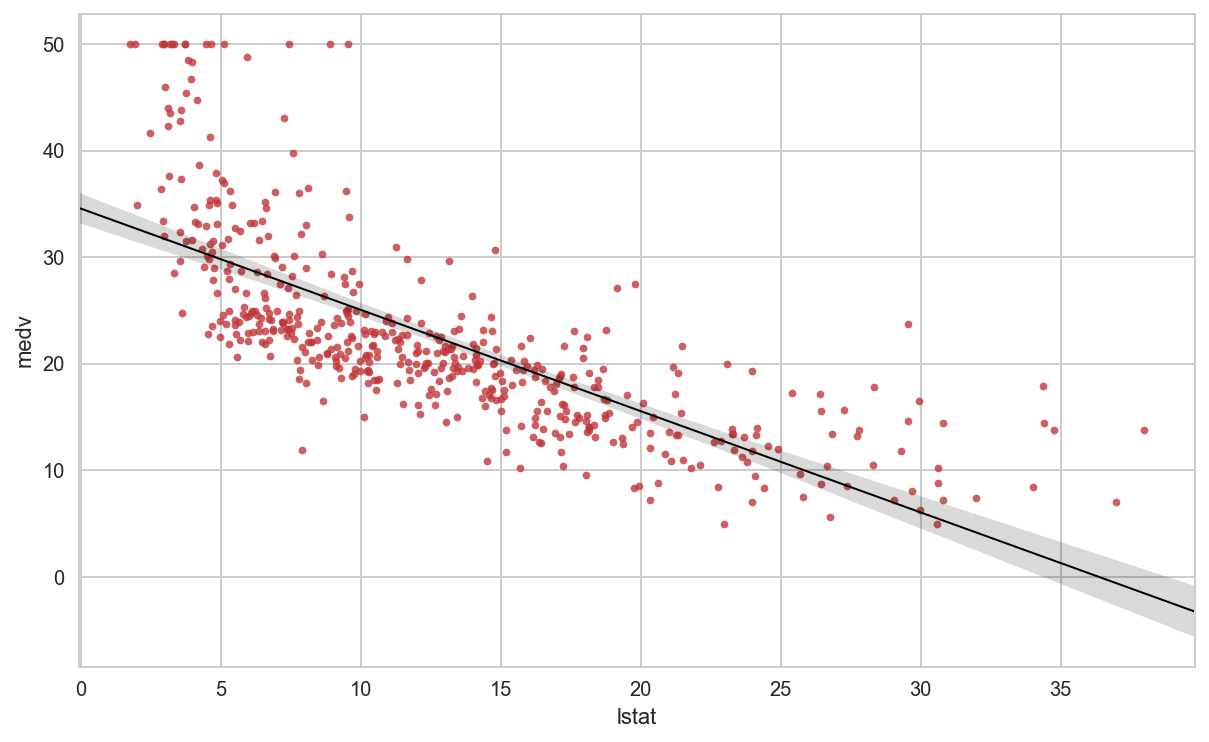

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='lstat', y='medv', data=boston_data, scatter_kws={'s':15}, line_kws={'lw':1, 'color':'k'})

### Also take a look at the residual plot

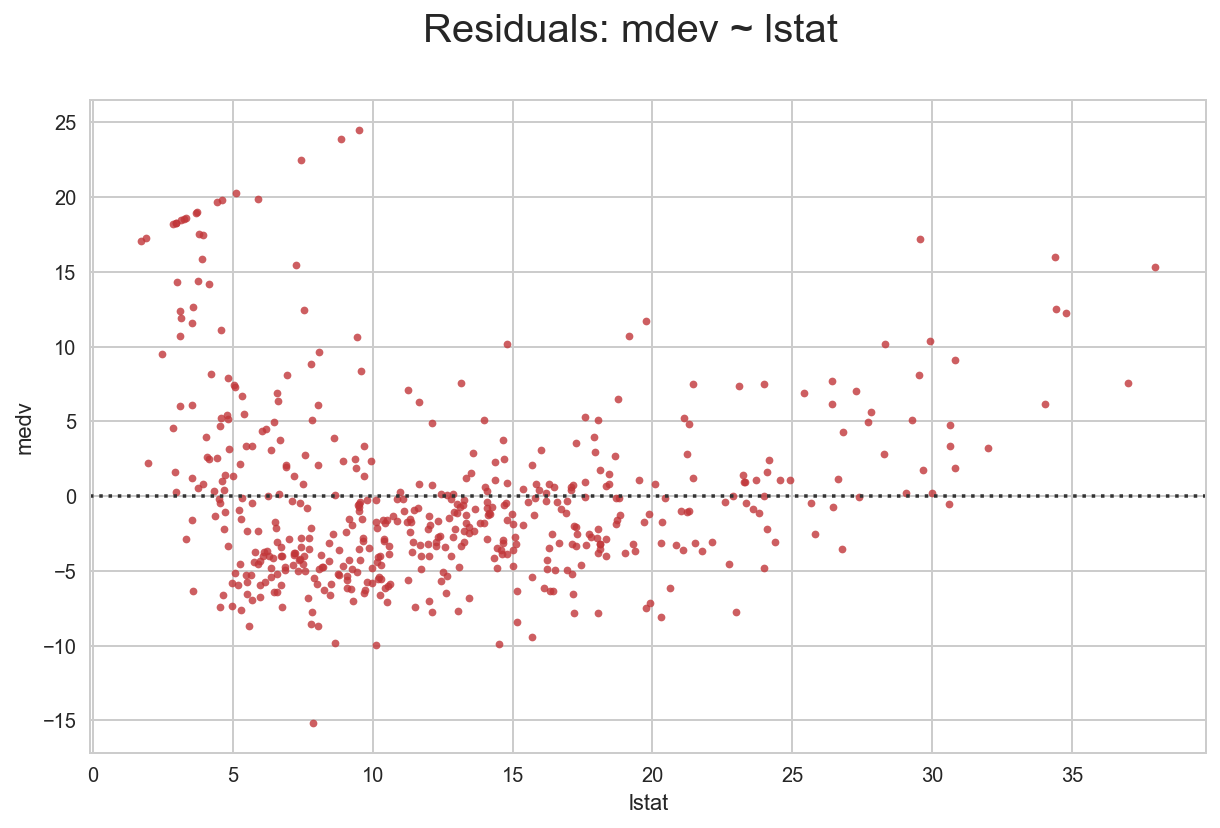

In [180]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Residuals: mdev ~ lstat', fontsize=20)
sns.residplot(data=boston_data, x='lstat', y='medv',
              scatter_kws={'s':15},
              line_kws={'color':'k', 'linewidth': 1})

## Training the Model

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
# Create and train the model

X = boston_data['lstat'].values.reshape(-1, 1)
y = boston_data['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = skl_lm.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluate the model

In [53]:
print('Intercept:', lm.intercept_)
print('Coefficient', lm.coef_)

Intercept: 33.9994223593
Coefficient [-0.94396182]


### Predictions of the model

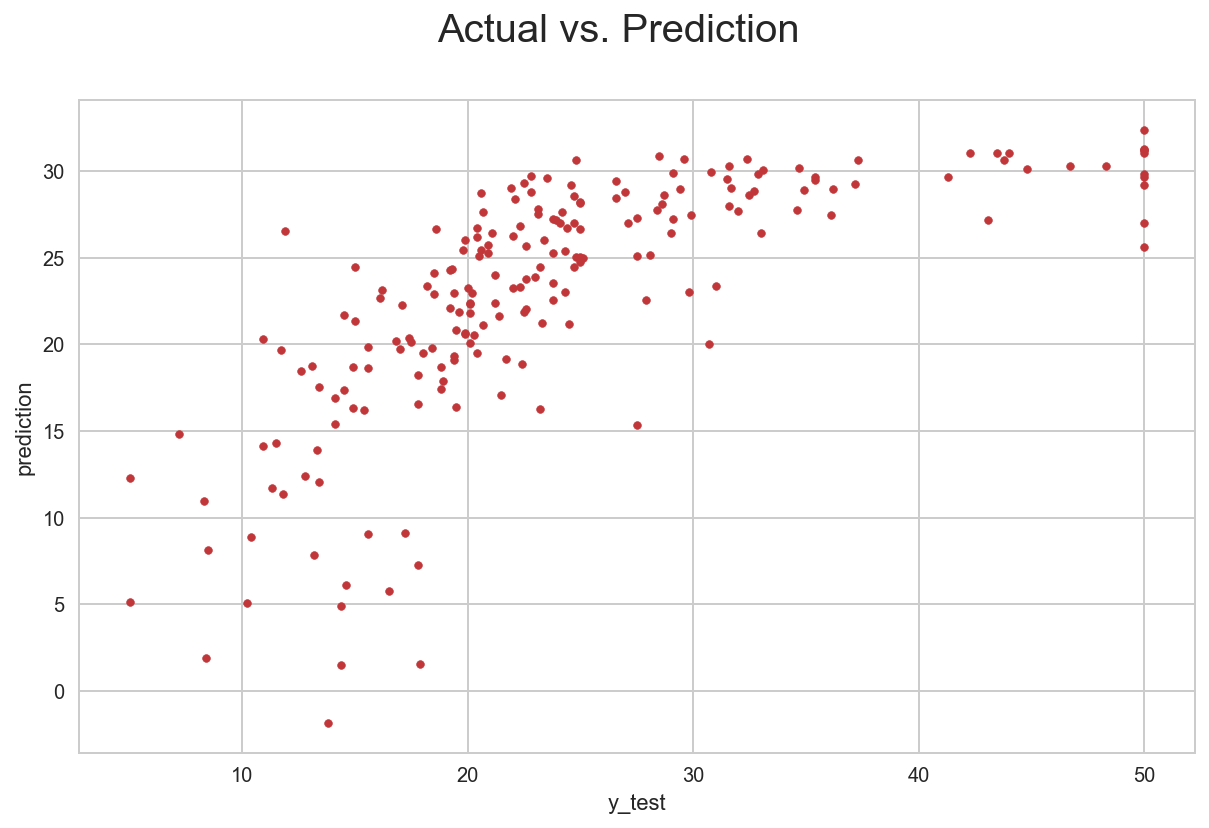

In [54]:
predictions = lm.predict(X_test)

fig = plt.figure(figsize=(10,6))
fig.suptitle('Actual vs. Prediction', fontsize=20)

plt.scatter(y_test, predictions, s=15)
plt.xlabel("y_test")
plt.ylabel("prediction")

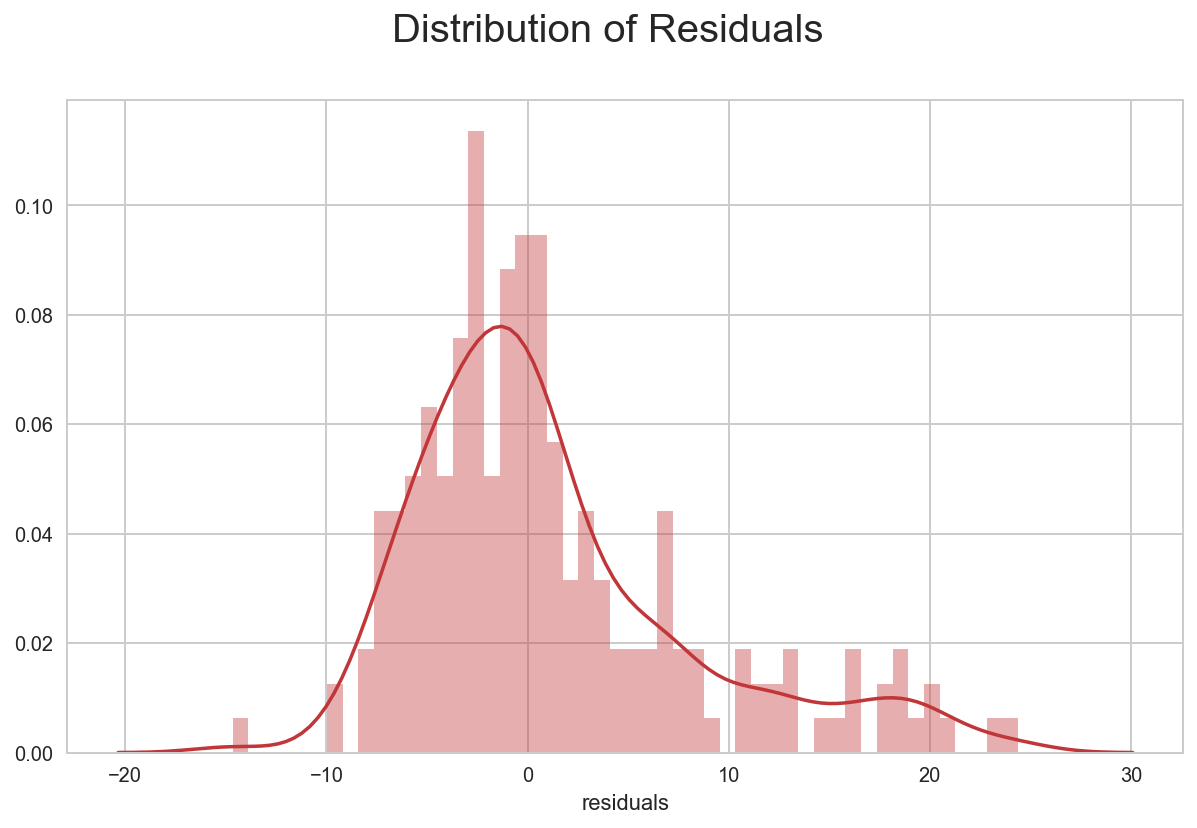

In [55]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Distribution of Residuals', fontsize=20)
sns.distplot((y_test-predictions),bins=50, axlabel='residuals');

### Evaulating regression metrics

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.08729643189
MSE: 51.5103925286
RMSE: 7.17707409246


## Multiple Regression

### Creating and fit a multiple linear regression model: medv ~ lstat + age

In [69]:
est = smf.ols('medv ~ lstat + age', boston_data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           2.98e-88
Time:                        15:57:36   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

### A model that includes all predictors

In [117]:
# Create a string for the formula
predictors = boston_data.drop('medv', axis=1).columns
formula = 'medv ~ ' + ' + '.join(predictors)

# show the formula
print(formula)

# fit the model
est = smf.ols(formula, boston_data).fit()
print(est.summary())

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 04 Oct 2017   Prob (F-statistic):          6.72e-135
Time:                        17:37:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [84]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Break into left and right hand side; y and X
y, X = dmatrices(formula, data=boston_data, return_type="dataframe")

# For each Xi, calculate VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i).round(2) for i in range(X.shape[1])]
vif["Predictor"] = X.columns

vif.set_index('Predictor')

,VIF
Predictor,
Intercept,585.27
crim,1.79
zn,2.30
indus,3.99
chas,1.07
nox,4.39
rm,1.93
age,3.10
dis,3.96


## Interaction Terms

In [86]:
# use the syntax 'lstat * age'
est = smf.ols('medv ~ lstat * age', boston_data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           4.86e-88
Time:                        16:14:00   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## Non-linear Transformation of Predictors

In [90]:
# Inclduing a quadratic term
est = smf.ols('medv ~ lstat + I(lstat**2)', boston_data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 04 Oct 2017   Prob (F-statistic):          1.56e-112
Time:                        16:24:31   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [96]:
# creating a log fit
est = smf.ols('medv ~ np.log(rm)', boston_data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           1.22e-64
Time:                        16:37:48   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

## Qualitative Predictors

**Dataset**: Carseats.csv; Sales of carseats; 400 observations on the following 11 variables.
    
**Variables**:

* Sales: Unit sales (in thousands) at each location
* CompPrice: Price charged by competitor at each location
* Income: Community income level (in thousands of dollars)
* Advertising: Local advertising budget for company at each location (in thousands of dollars)
* Population: Population size in region (in thousands)
* Price: Price company charges for car seats at each site
* ShelveLoc: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* Age: Average age of the local population
* Education: Education level at each location
* Urban: A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US: A factor with levels No and Yes to indicate whether the store is in the US or not

In [101]:
carseats = pd.read_csv('data/ISLR/Carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [102]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [109]:
# Select numerical variables
numvars = carseats['Sales CompPrice Income Advertising Population Price Age'.split()]

In [108]:
numvars.describe().round(2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,7.50,124.98,68.66,6.64,264.84,115.80,53.32
std,2.82,15.33,27.99,6.65,147.38,23.68,16.20
min,0.00,77.00,21.00,0.00,10.00,24.00,25.00
25%,5.39,115.00,42.75,0.00,139.00,100.00,39.75
50%,7.49,125.00,69.00,5.00,272.00,117.00,54.50
75%,9.32,135.00,91.00,12.00,398.50,131.00,66.00
max,16.27,175.00,120.00,29.00,509.00,191.00,80.00


In [119]:
predictors = carseats.drop('Sales', axis=1).columns
formula = 'Sales ~ Income:Advertising + Price:Age + ' + " + ".join(predictors)

print(formula)

est = smf.ols(formula, carseats).fit()
print(est.summary())

Sales ~ Income:Advertising + Price:Age + CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 04 Oct 2017   Prob (F-statistic):          6.14e-166
Time:                        17:37:40   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.

---
### References:

ISLR-python: http://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%203.ipynb